In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
qald_9_test = pd.read_csv('../data/alpe-experiments/merged/qald-9-plus-test.tsv', sep='\t')
qald_9_train = pd.read_csv('../data/alpe-experiments/merged/qald-9-plus-train.tsv', sep='\t')
qald_10 = pd.read_csv('../data/alpe-experiments/merged/qald-10.tsv', sep='\t')

In [3]:
qald_9_test.head()

,id,prompt,generated_nl,gold_standard_nl,lang,model,prompt_type,query,tokenized_generated_nl,tokenized_gold_standard_nl,sentence_bleu,sentence_nist,rougeL,levenshtein,same,3%,correct,73%
0,99,Having a SPARQL query: SELECT DISTINCT ?o1 WHE...,What are the distinct values of the time zones...,What is the time zone of Salt Lake City?,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o1 WHERE { <http://www.wikida...,"['What', 'are', 'the', 'distinct', 'values', '...","['What', 'is', 'the', 'time', 'zone', 'of', 'S...",0.1930,1.7587,0.4167,44,0.0,NaN,1.0,NaN
1,98,Having a SPARQL query: SELECT DISTINCT ?o1 WHE...,What are the names of the individuals who kill...,Who killed Caesar?,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o1 WHERE { <http://www.wikida...,"['What', 'are', 'the', 'names', 'of', 'the', '...","['Who', 'killed', 'Caesar', '?']",0.1834,0.5000,0.3077,45,0.0,NaN,1.0,NaN
2,86,Having a SPARQL query: PREFIX wdt: <http://www...,What is the highest mountain in Germany based ...,What is the highest mountain in Germany?,en,gpt-3.5-turbo,ZERO_SHOT,PREFIX wdt: <http://www.wikidata.org/prop/dire...,"['What', 'is', 'the', 'highest', 'mountain', '...","['What', 'is', 'the', 'highest', 'mountain', '...",0.4137,1.6000,0.5714,39,0.0,NaN,1.0,NaN
3,84,Having a SPARQL query: SELECT DISTINCT ?o WHER...,Which head of government of the United States ...,Which American presidents were in office durin...,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o WHERE { <http://www.wikidat...,"['Which', 'head', 'of', 'government', 'of', 't...","['Which', 'American', 'presidents', 'were', 'i...",0.0860,0.6919,0.2500,111,0.0,NaN,1.0,NaN
4,81,Having a SPARQL query: PREFIX wd: <http://www....,Who is the head of government of Butch Otter?,Butch Otter is the governor of which U.S. state?,en,gpt-3.5-turbo,ZERO_SHOT,PREFIX wd: <http://www.wikidata.org/entity/> P...,"['Who', 'is', 'the', 'head', 'of', 'government...","['Butch', 'Otter', 'is', 'the', 'governor', 'o...",0.2804,1.9932,0.3333,31,0.0,NaN,0.0,NaN


# Qald 9 plus Test (TODO: merge all 3 DSs)

In [4]:
# List of metrics to visualize
metrics = ['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']

# Rename metrics for better visualization
metric_names = {
    'sentence_bleu': 'Sentence BLEU',
    'sentence_nist': 'Sentence NIST',
    'rougeL': 'ROUGE-L',
    'levenshtein': 'Levenshtein',
    'Decision': 'Human Decision'
}

# Rename models for better visualization
model_names = {
    'gpt-3.5-turbo': 'GPT-3.5',
    'gpt-4-1106-preview': 'GPT-4',
    'mistralai/Mistral-7B-Instruct-v0.2': 'Mistral-7B',
    'perevalov/Mistral-7B-instruct-v0.2-SPARQL2NL': 'Mistral-7B Fine-Tuned'
}

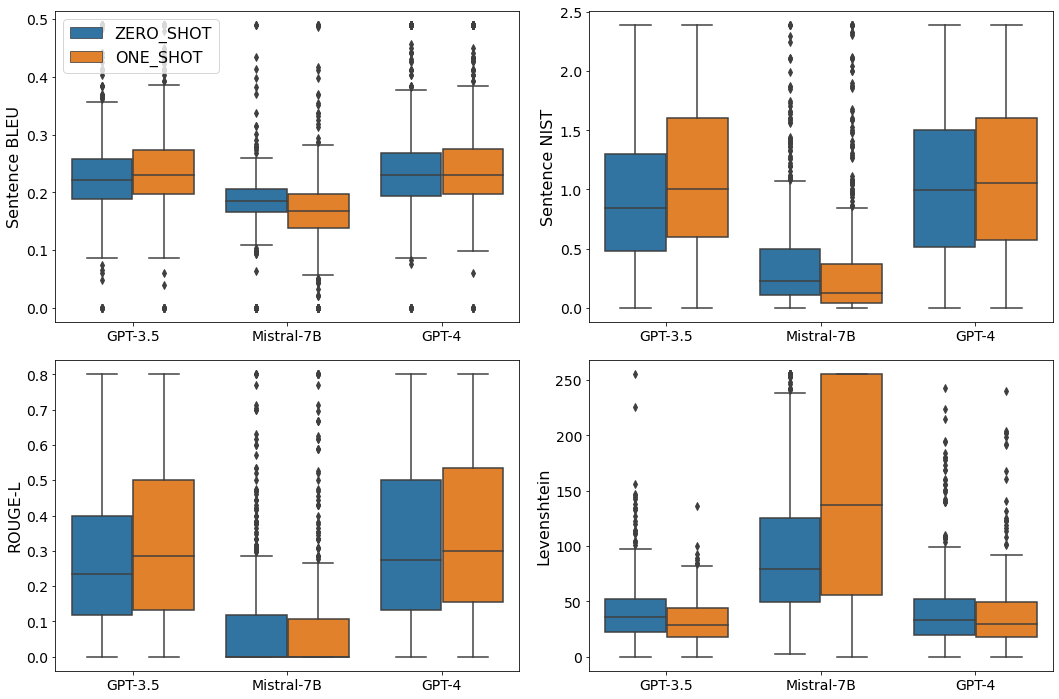

In [26]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10))


plt.rcParams.update({'font.size': 16, 'axes.titlesize': 16, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# Reshape axs to 1D for easy iteration
axs = axs.ravel()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Clip values by 95%
    clipped_data = qald_9_test[metric].clip(upper=qald_9_test[metric].quantile(0.95))
    
    # Filter data for ONE_SHOT and ZERO_SHOT prompt types
    filtered_data = qald_9_test[qald_9_test['prompt_type'].isin(['ONE_SHOT', 'ZERO_SHOT'])]
    
    metric = metric_names[metric]
    
    # Replace model names in the dataframe
    filtered_data['model'] = filtered_data['model'].map(model_names)
    # Create a bar plot for each model and prompt type
    sns.boxplot(x='model', y=clipped_data, hue='prompt_type', data=filtered_data, ax=axs[i])
    # axs[i].set_title(f'Distribution of {metric} for each model and prompt type')
    axs[i].set_xlabel('')
    axs[i].set_ylabel(metric)
    if i == 0:
        axs[i].legend(loc="upper left")
    else: 
        axs[i].legend().remove()

plt.tight_layout()
plt.savefig("../data/res/prompt-types.pdf")
plt.show()

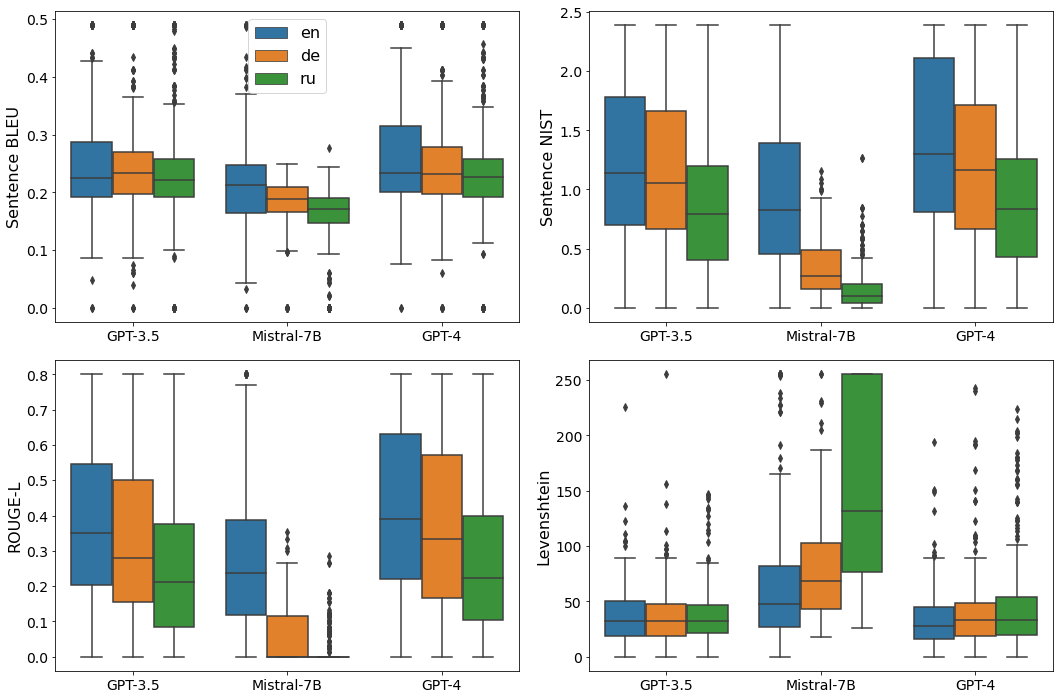

In [36]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Reshape axs to 1D for easy iteration
axs = axs.ravel()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Clip values by 95%
    clipped_data = qald_9_test[metric].clip(upper=qald_9_test[metric].quantile(0.95))
    filtered_data = qald_9_test[qald_9_test['prompt_type'].isin(['ONE_SHOT', 'ZERO_SHOT'])]
    metric = metric_names[metric]
    
    # Replace model names in the dataframe
    filtered_data['model'] = filtered_data['model'].map(model_names)

    sns.boxplot(x='model', y=clipped_data, hue='lang', data=filtered_data, ax=axs[i])
    # axs[i].set_title(f'Distribution of {metric} for each model and language')
    
    axs[i].set_xlabel('')
    axs[i].set_ylabel(metric)
    if i == 0:
        axs[i].legend(loc="upper center")
    else: 
        axs[i].legend().remove()

plt.tight_layout()
plt.savefig("../data/res/languages.pdf")
plt.show()


# Qald 9 plus Train

# TODO: correlation with human analysis

In [5]:
import os 

# Create an empty DataFrame to store all the data
all_data = pd.DataFrame()

# Loop through each file in the directory
for file in os.listdir("../data/human-eval/"):
    df = pd.read_csv(f"../data/human-eval/{file}", sep='\t')
    df = df[df['Decision'].isin(['Yes', 'No'])]
    df.rename(columns={'language': 'lang'}, inplace=True)

    # Merge df and qald_9_test on 'id', 'lang', 'model', 'prompt'
    merged_df = pd.merge(df, qald_9_test, on=['id', 'lang', 'model', 'prompt'])
    # Convert 'Decision' column to integer type
    merged_df['Decision'] = merged_df['Decision'].map({'Yes': 1, 'No': 0})

    # Append the merged_df to all_data
    all_data = all_data.append(merged_df, ignore_index=True)

# Print the correlation of all_data
print(all_data[['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein', 'Decision']][all_data.model=="gpt-4-1106-preview"].corr()["Decision"])
print(all_data[['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein', 'Decision']][all_data.model=="gpt-3.5-turbo"].corr()["Decision"])
print(all_data[['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein', 'Decision']][all_data.model=="mistralai/Mistral-7B-Instruct-v0.2"].corr()["Decision"])

sentence_bleu    0.154960
sentence_nist    0.169312
rougeL           0.217723
levenshtein     -0.187537
Decision         1.000000
Name: Decision, dtype: float64
sentence_bleu    0.231772
sentence_nist    0.159646
rougeL           0.237324
levenshtein     -0.227122
Decision         1.000000
Name: Decision, dtype: float64
sentence_bleu    0.334091
sentence_nist    0.432255
rougeL           0.428123
levenshtein     -0.364822
Decision         1.000000
Name: Decision, dtype: float64


/tmp/ipykernel_15501/305068679.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(merged_df, ignore_index=True)
/tmp/ipykernel_15501/305068679.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(merged_df, ignore_index=True)
/tmp/ipykernel_15501/305068679.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(merged_df, ignore_index=True)
/tmp/ipykernel_15501/305068679.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(merged_df, ignore_index=True)
/tmp/ipykernel_15501/305068679.py:18: FutureWarning: The frame.append method is 

In [25]:
all_data[all_data.Decision == 1][['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']].describe()

,sentence_bleu,sentence_nist,rougeL,levenshtein
count,694.000000,694.000000,694.000000,694.000000
mean,0.290232,1.384048,0.429923,33.867435
std,0.178245,0.726472,0.262520,26.512536
min,0.000000,0.000000,0.000000,0.000000
25%,0.198300,0.807850,0.235300,17.000000
50%,0.234200,1.281700,0.381000,28.000000
75%,0.293200,1.993200,0.615400,45.000000
max,1.000000,3.329400,1.000000,226.000000


In [26]:
all_data[all_data.Decision == 0][['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']].describe()

,sentence_bleu,sentence_nist,rougeL,levenshtein
count,314.000000,314.000000,314.000000,314.000000
mean,0.204221,0.950218,0.255500,68.847134
std,0.068372,0.627824,0.198153,75.604458
min,0.032900,0.052800,0.000000,7.000000
25%,0.162175,0.473275,0.111100,34.000000
50%,0.198050,0.817450,0.222200,51.000000
75%,0.236675,1.268000,0.379500,75.000000
max,0.607700,2.839500,0.857100,889.000000


In [5]:
from rdflib.plugins.sparql.parser import parseQuery

In [6]:
def add_query_params_to_df(query, df):
    try:
        parse_results = parseQuery(query)
        # Add prefix presence
        df['prefix_presence'] = len(parse_results[0]) > 0
        # Add presence of projection
        df['query_type'] = 'SELECT' if 'projection' in parse_results[1].keys() else 'ASK'
        # Add num of triples
        df['num_of_triples'] = len(parse_results[1]['where']['part'][0]['triples'][0])//3 if 'triples' in parse_results[1]['where']['part'][0].keys() else 0
        # Add presence of orderby
        df['orderby_presence'] = 'orderby' in parse_results[1].keys()
        # Add presence of limitoffset
        df['limitoffset_presence'] = 'limitoffset' in parse_results[1].keys()
        # Add presence of having
        df['having_presence'] = 'having' in parse_results[1].keys()
    except:
        print("Error in parsing the query")
        df['prefix_presence'] = 0
        df['query_type'] = 0
        df['num_of_triples'] = 0
        df['orderby_presence'] = False
        df['limitoffset_presence'] = False
        df['having_presence'] = False
        return df

    return df
# Assuming the other datasets are named as qald_9_train, qald_10.
datasets = [qald_9_test, qald_9_train, qald_10]
new_datasets = []
for dataset in datasets:
    print("1")
    dataset = dataset.apply(lambda row: add_query_params_to_df(row['query'], row), axis=1)
    new_datasets.append(dataset)

# Merge the datasets into one
merged_datasets = pd.concat(new_datasets, ignore_index=True)

1
1
1
Error in parsing the query


In [8]:
# Analyse the query metrics like prefix_presence wr.t. the generaton metrics e.g. sentence_bleu, sentence_nist, rougeL, levenshtein
metrics = ['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']
features = ['prefix_presence', 'query_type', 'num_of_triples', 'orderby_presence', 'limitoffset_presence', 'having_presence']

# Calculate the correlation matrix between the metrics and features
corr_matrix = merged_datasets[metrics + features].corr()

# Display the correlation matrix
# print(corr_matrix)

/tmp/ipykernel_71132/3206579275.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_datasets[metrics + features].corr()


In [7]:
for m in metrics:
    merged_datasets[m] = merged_datasets[m].clip(upper=merged_datasets[m].quantile(0.95))

In [10]:
metrics

['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein', 'Decision']

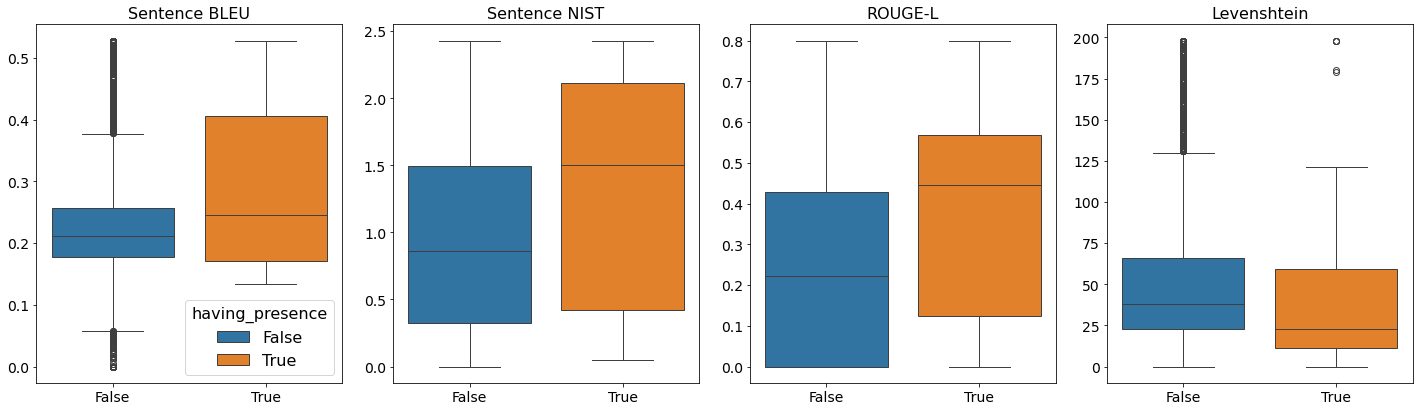

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


query_param = 'having_presence'#, 'query_type', 'num_of_triples', 'orderby_presence', 'limitoffset_presence', 'having_presence']

plt.rcParams.update({'font.size': 16, 'axes.titlesize': 16, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
# Change the subplot configuration to have all plots in one row
fig, axs = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 6))

# Create a subplot for each metric
# fig, axs = plt.subplots(len(metrics), figsize=(10, 6*len(metrics)))

for i, metric in enumerate(metrics):
    merged_datasets = merged_datasets[merged_datasets.num_of_triples > 0]
    if metric == 'Decision':
        sns.countplot(x=query_param, hue=metric, data=merged_datasets, ax=axs[i], log_scale=True)
        # sns.countplot(x=query_param, hue=metric, data=merged_datasets, ax=axs[i], log)
        axs[i].set_xticklabels(['False', 'True'])
        #sns.scatterplot(x=query_param, y=metric, size=metric, hue=query_param, data=merged_datasets, ax=axs[i], sizes=(200, 800))
        # axs[i].set_xticklabels(['False', 'True'])
    else:
        sns.boxplot(x=query_param, y=metric, data=merged_datasets, hue=query_param, ax=axs[i])
    # sns.boxplot(x=query_param, y=metric, data=merged_datasets, ax=axs[i])
    axs[i].set_xlabel("")
    metric = metric_names[metric]
    axs[i].set_title(f'{metric}')
    axs[i].set_ylabel("")
    if i > 0:
        axs[i].legend().remove()

plt.tight_layout()
plt.savefig(f"../data/res/{query_param}.pdf")
plt.show()

# Metric optimization

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



# Define the features and the target
X = all_data[['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']]
y = all_data['Decision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = LogisticRegression(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(clf, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


              precision    recall  f1-score   support

           0       0.52      0.20      0.29        60
           1       0.73      0.92      0.82       142

    accuracy                           0.71       202
   macro avg       0.63      0.56      0.55       202
weighted avg       0.67      0.71      0.66       202

Feature: 0, Score: -0.00099
Feature: 1, Score: 0.01188
Feature: 2, Score: 0.01386
Feature: 3, Score: 0.01881
